### linear regression

In [48]:
import numpy as np
np.random.seed(42)

In [2]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

(0, 15)

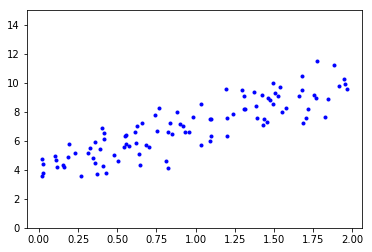

In [4]:
plt.plot(X, y, 'b.')
plt.ylim([0,15])

Calculating Theta Hat (value of hteta that minmizes cost function)

In [5]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [6]:
theta_best

array([[4.11274373],
       [2.97310315]])

In [7]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.11274373],
       [10.05895004]])

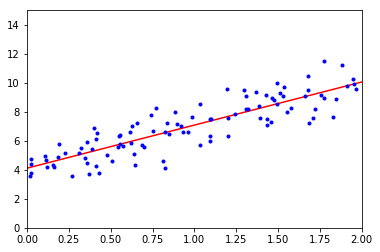

In [8]:
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

### Using SciKit Learn's module (normal equation)

In [13]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.11274373]), array([[2.97310315]]))

In [14]:
lin_reg.predict(X_new)

array([[ 4.11274373],
       [10.05895004]])

### Using SciKit lear SGDRegressor

In [15]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

C:\Users\jwharton\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=50, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [16]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.17062434]), array([3.05422732]))

### Polynomial Regression

In [17]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

Text(0,0.5,'y')

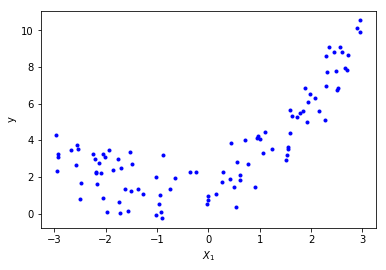

In [25]:
plt.plot(X, y, 'b.')
plt.xlabel('$X_1$')
plt.ylabel('y')

In [20]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [21]:
X[0]

array([-1.27491621])

In [22]:
X_poly[0]

array([-1.27491621,  1.62541135])

In [24]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.59558883]), array([[1.02996218, 0.59602469]]))

In [27]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

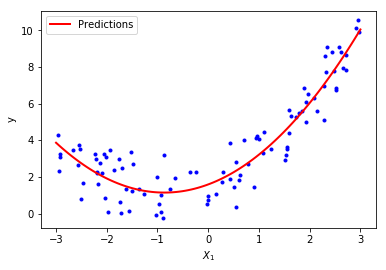

In [31]:
plt.plot(X, y, 'b.')
plt.xlabel('$X_1$')
plt.ylabel('y')
plt.plot(X_new, y_new,  "r-", linewidth=2, label="Predictions")
plt.legend()

In [32]:
## Learning Curve

In [34]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [49]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label='val')
    plt.legend()
    
    


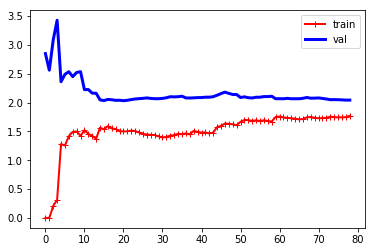

In [50]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)